# <font color='blue'>Regressão Linear - Exemplo 002</font>

# Processo para o Desenvolvimento de Machine Learning

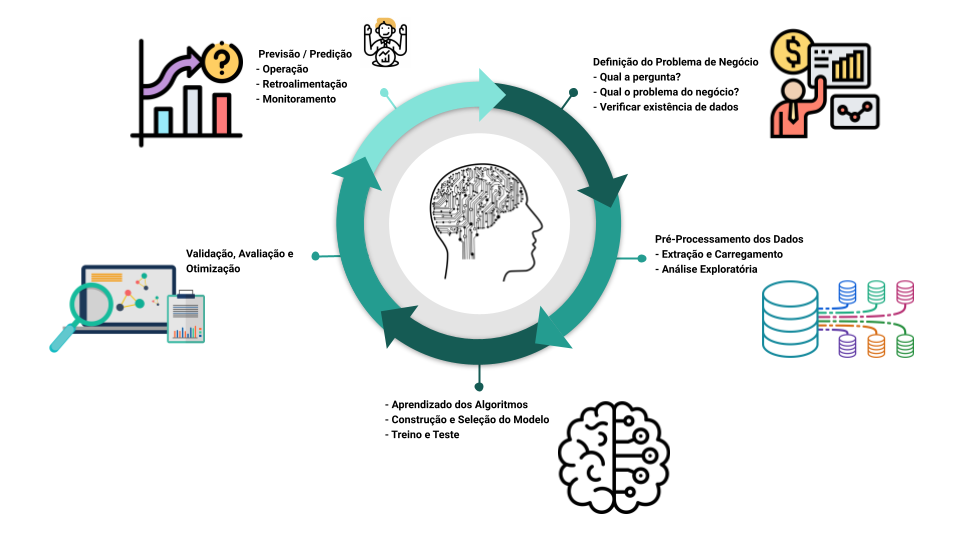

In [1]:
from IPython.display import Image
Image('Processo.png')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

import warnings
import sklearn as sl
warnings.filterwarnings("ignore")
sl.__version__

'1.2.2'

## Definição do Problema de Negócio

## Pré-Processamento dos Dados

### Extração e Carregamento

In [3]:
# Carregando arquivo csv usando Pandas (método que usaremos neste notebook)
dados = pd.read_csv('Pesos_Alturas.csv',decimal=',')

### Análise Exploratória

#### Estatística Descritiva

In [4]:
# Visualizando as primeiras 10 linhas
print(dados.head(10))

   Pesos  Alturas
0     46     1.50
1     64     1.66
2     59     1.61
3     58     1.64
4     59     1.57
5     71     1.68
6     52     1.60
7     75     1.67
8     51     1.57
9     47     1.62


Se o número de linhas no seu arquivo for muito grande, o algoritmo pode levar muito tempo para ser treinado. Se o número de registros for muito pequeno, você pode não ter registros suficientes para treinar seu modelo.

Se você tiver muitas colunas em seu arquivo, o algoritmo pode apresentar problemas de performance devido a alta dimensionalidade.

A melhor solução vai depender de cada caso. Mas lembre-se: treine seu modelo em um subset do seu conjunto de dados maior e depois aplique o modelo a novos dados.


In [5]:
# Visualizando as dimensões
dados.shape

(5000, 2)

In [6]:
# Tipo de dados de cada atributo
dados.dtypes

Pesos        int64
Alturas    float64
dtype: object

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pesos    5000 non-null   int64  
 1   Alturas  5000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 78.2 KB


In [8]:
print(dados.dtypes)


Pesos        int64
Alturas    float64
dtype: object


In [9]:
dados['Alturas'] = dados['Alturas'].astype(float)
dados['Pesos']   = dados['Pesos'].astype(int)


In [10]:
# Tipo de dados de cada atributo
dados.dtypes

Pesos        int64
Alturas    float64
dtype: object

In [11]:
# Sumário estatístico
dados.describe()

,Pesos,Alturas
count,5000.000000,5000.000000
mean,61.635400,1.618112
std,8.635727,0.068502
min,29.000000,1.380000
25%,56.000000,1.570000
50%,62.000000,1.620000
75%,67.250000,1.670000
max,92.000000,1.860000


A correlação é o relacionamento entre 2 variáveis. O método mais comum para calcular correlação é o método de Pearson, que assume uma distribuição normal dos dados. Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

Alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados (colineares).

In [12]:
# Correlação
dados.corr()

,Pesos,Alturas
Pesos,1.000000,0.848349
Alturas,0.848349,1.000000


#### Visualização

Iniciamos a análise exploratória, com o histograma, pois podemos rapidamente avaliar a distribuição de cada atributo. 

Os histogramas agrupam os dados em bins e fornecem uma contagem do número de observações em cada bin. 

Com o histograma, você pode rapidamente verificar a simetria dos dados e se eles estão em distribuição normal ou não. 

Isso também vai ajudar na identificação dos outliers.

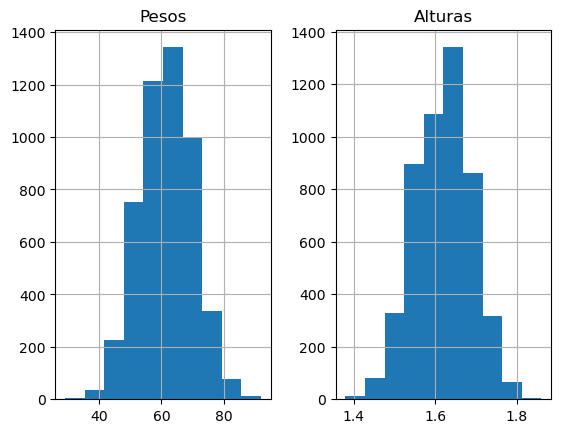

In [13]:
# Histograma Univariado
dados.hist()
plt.show()

<Figure size 640x480 with 0 Axes>

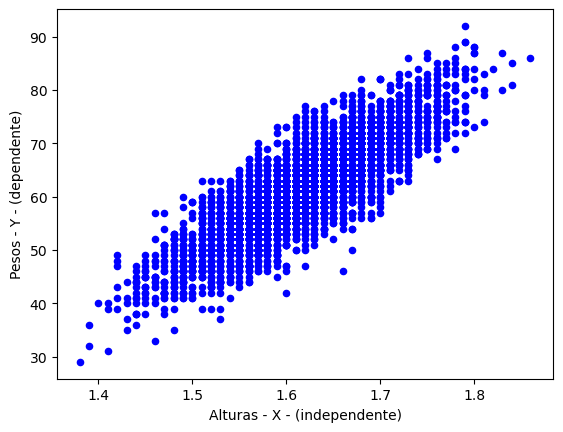

In [14]:
# Visualização 
dados1 = dados.sort_values('Alturas')

plt.figure()

dados1.plot.scatter(x='Alturas',
                       y='Pesos',
                       c='blue')

plt.xlabel('Alturas - X - (independente)')
plt.ylabel('Pesos - Y - (dependente)')
plt.show()

## Aprendizado dos Algoritmos

### Regressão Linear com Scikit-learn

In [15]:
from sklearn.model_selection import train_test_split
%matplotlib inline

#### Separar os dados em Treino e Teste
Nesta análise, vamos tentar prever o peso de uma pessoa, dada a sua altura


(test_size = .02) ou seja, 20% para teste

(random_state=4) para assegurar os mesmos valores em todas as vezes.


In [16]:
# Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(dados[['Alturas']],dados[['Pesos']],test_size=.02, random_state=4)

#### Criando o modelo de regressão

In [17]:
# Criando o modelo
modelo = LinearRegression()

#### Treinando o modelo de regressão

In [18]:
# Treinando o modelo
modelo.fit(X_train, y_train)

LinearRegression()

## Validação, Avaliação e Otimização

Métricas Para Avaliar Modelos de Regressão

- Mean Squared Error (MSE)
- score()
- Mean Absolute Error (MAE)
- R Squared (R²)

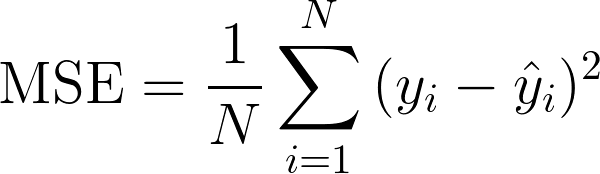

In [19]:
from IPython.display import Image
Image('mse.png')

É talvez a métrica mais simples e comum para a avaliação de regressão, mas também provavelmente a menos útil. O MSE basicamente mede o erro quadrado médio de nossas previsões. Para cada ponto, calcula a diferença quadrada entre as previsões e o valor real da variável alvo e, em seguida, calcula a média desses valores.

Quanto maior esse valor, pior é o modelo. Esse valor nunca será negativo, já que estamos elevando ao quadrado os erros individuais de previsão, mas seria zero para um modelo perfeito.

In [20]:
# Fazendo previsões com dados de Teste
Y_pred = modelo.predict(X_test)

In [21]:
# MSE - Mean Squared Error
# Similar ao MAE, fornece a magnitude do erro do modelo.
# Quanto maior, pior é o modelo!
# Ao extrairmos a raiz quadrada do MSE convertemos as unidades de volta ao original, 
# o que pode ser útil para descrição e apresentação. Isso é chamado RMSE (Root Mean Squared Error)

# Import dos módulos
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, Y_pred)
print("O MSE do modelo é:", mse)

O MSE do modelo é: 18.96478479616245


### O que faz a função .score()?

In [22]:
print(modelo.score(X_train,y_train))

0.7188575621605304


### Mean Absolute Error (MAE)

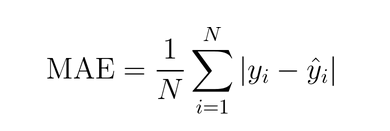

In [23]:
from IPython.display import Image
Image('mae.png')

In [24]:
# MAE
# Mean Absolute Error
# É a soma da diferença absoluta entre previsões e valores reais.
# Fornece uma ideia de quão erradas estão nossas previsões.
# Valor igual a 0 indica que não há erro, sendo a previsão perfeita.

# Import dos módulos
from sklearn.metrics import mean_absolute_error

# Resultado
mae = mean_absolute_error(y_test, Y_pred)
print("O MAE do modelo é:", mae)

O MAE do modelo é: 3.4165196922177063


### Coeficiente de Determinação (R²)

In [30]:
# R^2
# Essa métrica fornece uma indicação do nível de precisão das previsões em relação aos valores observados.
# Também chamado de coeficiente de determinação.
# Valores entre 0 e 1, sendo 0 o valor ideal.

# Import dos módulos
from sklearn.metrics import r2_score

# Resultado
r2 = r2_score(y_test, Y_pred)
print("O R2 do modelo é:", r2)

O R2 do modelo é: 0.7497293404450361


##  Previsão / Predição

Vamos agora predizer o peso de uma pessoa com 1 metro e 60 centimetros

In [31]:
print('predict: \n', modelo.predict([[1.60]]))

predict: 
 [[59.6825667]]


In [32]:
b1 = modelo.coef_.flatten()[0]
b0 = modelo.intercept_.flatten()[0]
print(b0, b1)

-111.1892067934576 106.79485843186832


In [33]:
# Definindo variáveis x e y
X = dados['Alturas'].values
Y = dados['Pesos'].values

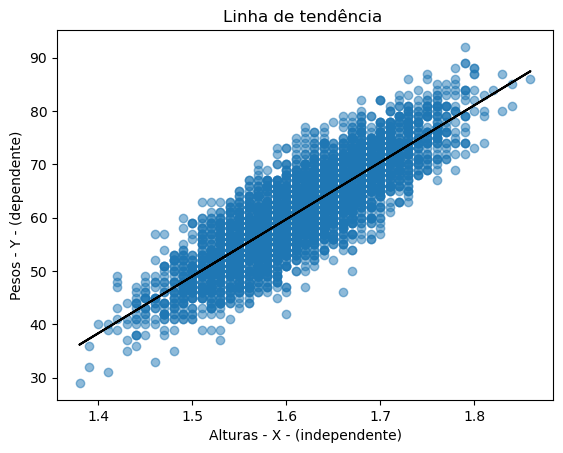

In [34]:
# Plot
plt.scatter(X, Y, alpha=0.5)
plt.title('Linha de tendência ')
plt.xlabel('Alturas - X - (independente)')
plt.ylabel('Pesos - Y - (dependente)')
plt.plot(X, (b0 + b1*X), color='black') # reta de tendência
plt.show()

# Salvando o resultado do seu trabalho

In [36]:
from pandas import read_csv
import pickle

In [37]:
# Salvando o modelo
arquivo = 'modelo_regressor_final.sav'
pickle.dump(modelo, open(arquivo, 'wb'))
print("Modelo salvo!")

Modelo salvo!


In [38]:
# Carregando o arquivo
modelo_regressor_final = pickle.load(open(arquivo, 'rb'))
print("Modelo carregado!")

Modelo carregado!


In [39]:
# Print do resultado
# Fazendo previsões

print('predict: \n', modelo_regressor_final.predict([[1.30]]))

predict: 
 [[27.64410917]]
